# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
city = 'badger'
city_url = query_url + city

city_weather = requests.get(city_url).json()

print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 64.8,
        "lon": -147.5333
    },
    "dt": 1711734365,
    "id": 5879898,
    "main": {
        "feels_like": -7.86,
        "humidity": 90,
        "pressure": 1005,
        "temp": -2.84,
        "temp_max": -0.01,
        "temp_min": -7.07
    },
    "name": "Badger",
    "sys": {
        "country": "US",
        "id": 2036575,
        "sunrise": 1711725298,
        "sunset": 1711773246,
        "type": 2
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 4.12
    }
}


In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | praya
Processing Record 3 of Set 1 | buka
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | belmonte
Processing Record 11 of Set 1 | east grand forks
Processing Record 12 of Set 1 | bamboo flat
Processing Record 13 of Set 1 | san felipe
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | oyama
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | kolonia
Processing Record 19 of Set 1 | christchurch
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | letlhakane
Processing Record 22 of Set 1 | la rin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,13.51,71,100,0.97,JP,1711734365
1,praya,14.9215,-23.5087,25.30,53,40,9.77,CV,1711734366
2,buka,40.8108,69.1986,8.91,76,100,3.23,UZ,1711734366
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711734367
4,grytviken,-54.2811,-36.5092,5.43,99,100,5.53,GS,1711734367


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,13.51,71,100,0.97,JP,1711734365
1,praya,14.9215,-23.5087,25.30,53,40,9.77,CV,1711734366
2,buka,40.8108,69.1986,8.91,76,100,3.23,UZ,1711734366
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711734367
4,grytviken,-54.2811,-36.5092,5.43,99,100,5.53,GS,1711734367


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

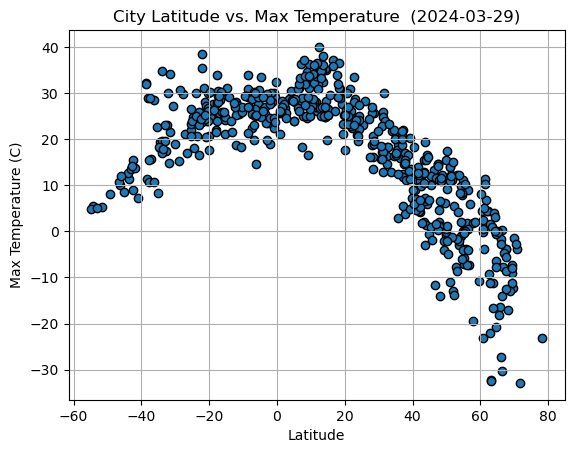

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", edgecolor="black")
import time 
today = time.strftime("%Y-%m-%d")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature  ({today})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

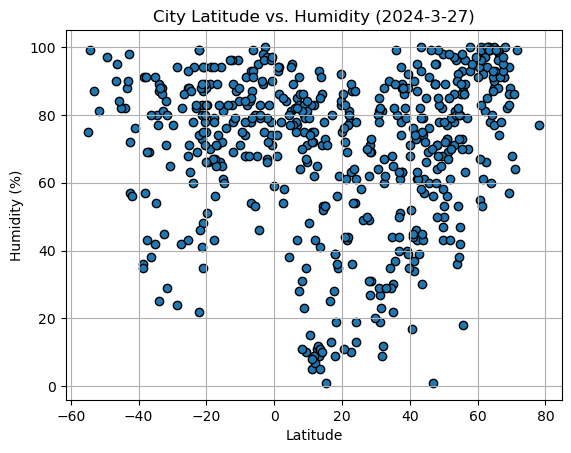

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-3-27)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

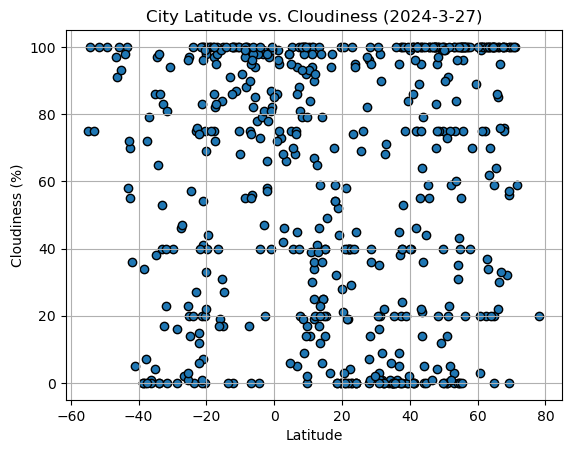

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-3-27)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

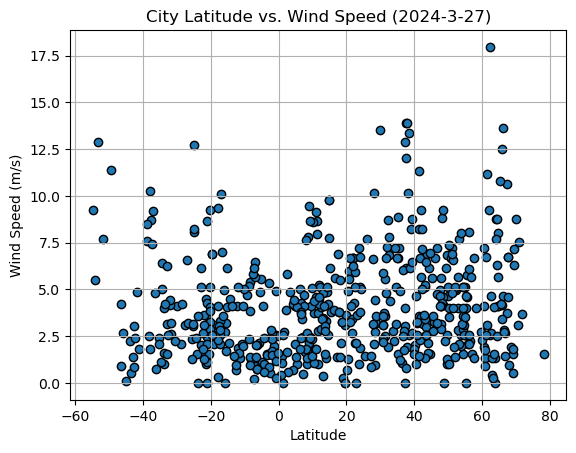

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-3-27)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

# defining function for scatterplot, regression line, general formatting, and printing r-value
def weather_linregplot(x_values, y_values, xlabel, ylabel):
    plt.scatter(x_values, y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    fit = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,fit, color='red')
    # applying min and max values
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")
    print(f"The r-squared value is: {rvalue**2}")
    plt.show

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,13.51,71,100,0.97,JP,1711734365
1,praya,14.9215,-23.5087,25.30,53,40,9.77,CV,1711734366
2,buka,40.8108,69.1986,8.91,76,100,3.23,UZ,1711734366
8,guerrero negro,27.9769,-114.0611,18.71,62,96,6.61,MX,1711734281
10,east grand forks,47.9300,-97.0245,2.13,64,100,4.12,US,1711734370


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,8.18,97,100,11.37,TF,1711734367
4,grytviken,-54.2811,-36.5092,5.43,99,100,5.53,GS,1711734367
5,ushuaia,-54.8000,-68.3000,4.81,75,75,9.26,AR,1711734242
6,atafu village,-8.5421,-172.5159,29.12,74,97,3.84,TK,1711734368
7,tual,-5.6667,132.7500,27.94,80,94,2.16,ID,1711734369


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7753515957225596


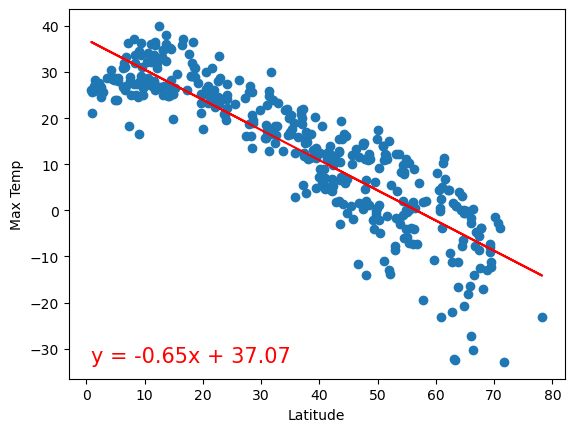

In [17]:
# Linear regression on Northern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp")

The r-squared value is: 0.3931776869798784


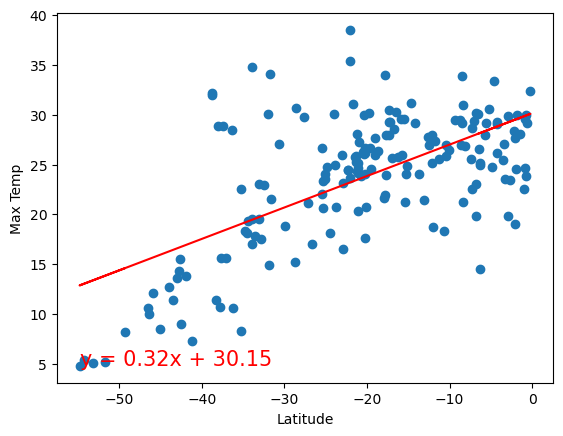

In [19]:
# Linear regression on Southern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temp")

**Discussion about the linear relationship:**

In the northern hemisphere, the plot and regression line visually suggest a negative correlation between temperature and latitude. This sample of northern cities indicates meaningful negative correlation based on the negative slope of the line and a high R-squared value (the coefficient of determination); the corresponding r value is very strong at ~0.88.

For the sampling of southern cities, there is a similar correlation indicating that max temperatures can be predicted to be lower as latitude increases (to be clear, increasing negative latitudes in the southern hemisphere move further south of the equator and closer to the south pole). The r-squared value is lower than that of the north, which may be due to the sample, but is still moderately to strongly meaningful in suggesting that variance in max temperature can be explained by latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.12549172871548434


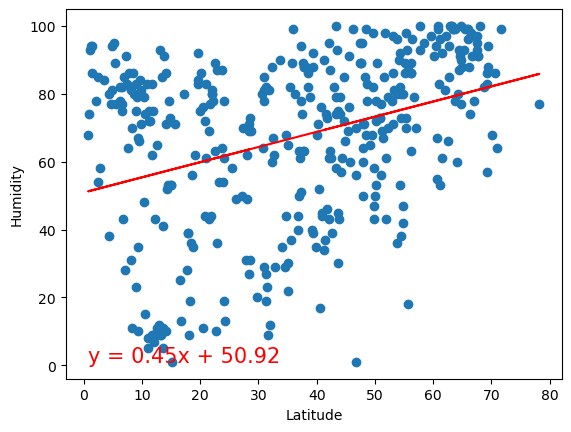

In [20]:
# Northern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity")

The r-squared value is: 0.015487232285228318


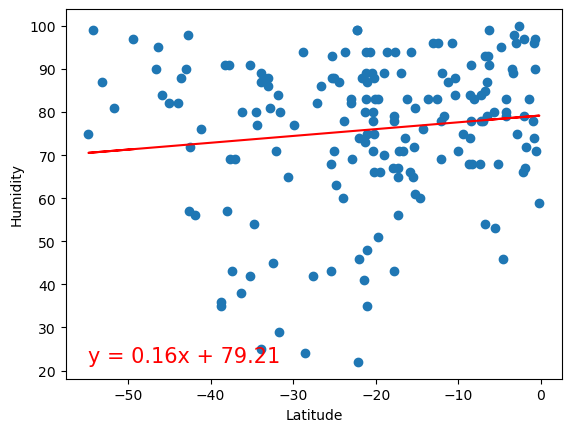

In [21]:
# Southern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity")

**Discussion about the linear relationship:**

Compared to maximum temperatures, the relationship of humidty to latitude is less meaningful. The northern hemisphere does depict a positive regression line slope and an R-squared value of 0.125 (equivalently, a still weak r-value of ~0.35), but the slope of the regression line is nearly flat for predicting additional plot points based on the sample of southern cities and its r-squared and r values are too small to accept that changes in humidity are dependent on latitude (the indepedent variable). Visually, it is also hard to recognize any meaningful relationship based on the scatterplot. Further investigation might be warranted as the northern chart suggests weak positive correlation of humidity to latitude, however the southern chart does not.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.025659322269666583


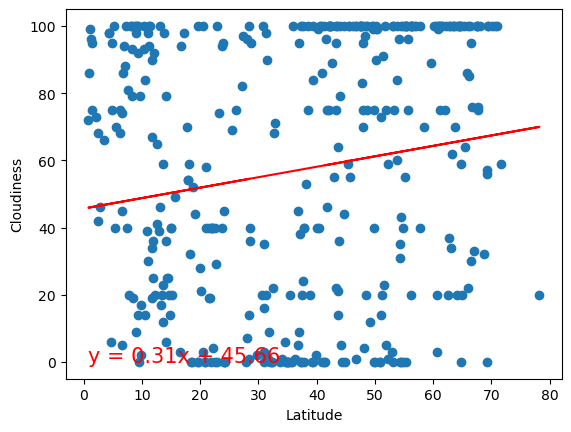

In [22]:
# Northern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

The r-squared value is: 0.044866378751076956


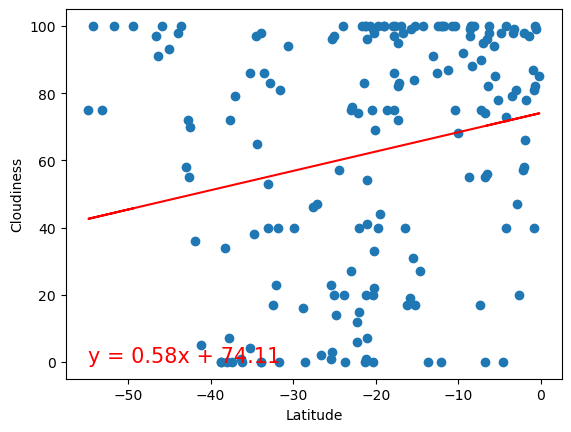

In [23]:
# Southern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness")

**Discussion about the linear relationship:**

While both plots of northern and southern hemisphere cloudiness by latitude resulted in regression lines with positive slopes, the slopes themselves are lower than 1 (which would indicate a 1:1 positive movement) and more importantly, the r-squared values are too low to be confident that the data fits the regression model well. Of any visual patterning in the scatter plot, there are many cities in the sample plotted at the extreme ends of the y-axis (hence the low correlation coefficients (r-value); this plotting suggests indicates no clouds or complete cloudiness for many sample cities. It would be interesting to continue sampling over time to understand whether or not sample distributions could be heavily impacted by day (or season to season) of sampling.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.01643574457227932


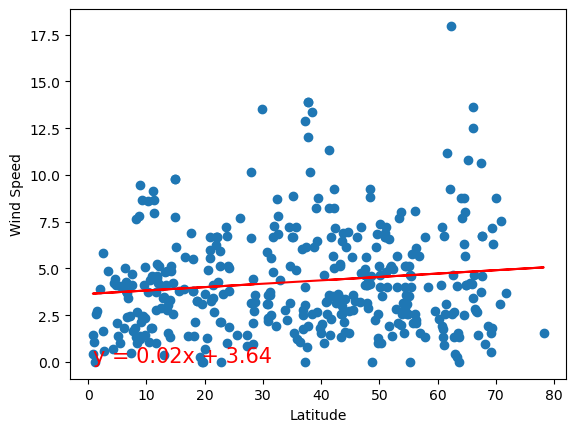

In [24]:
# Northern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

The r-squared value is: 0.0915644665567479


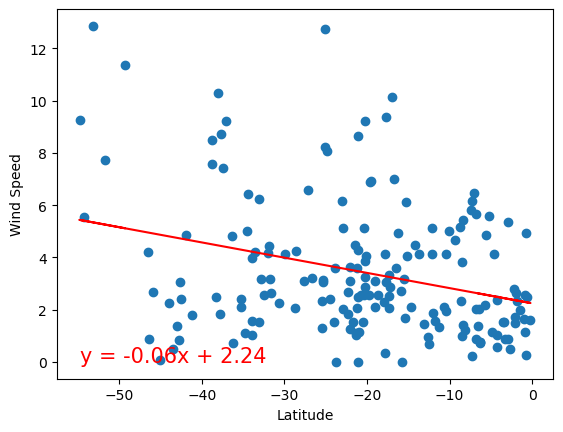

In [25]:
# Southern Hemisphere

#weather_linregplot(x_values, y_values, xlabel, ylabel)
weather_linregplot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed")

**Discussion about the linear relationship:**

The slopes of both lines (northern and southern) depicting wind speed by a sample city's latitude are nearly flat (0.02 and -0.06, respectively) and with relatively low r and r-squared values, the correlation coefficients and coefficients of determination do not suggest a relationship where wind speed is dependent on a sample city's latitude.